In [2]:
# Load the Dataset
import pandas as pd

df = pd.read_csv('/content/dataset.csv')
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


# Data Cleaning

In [3]:
# Missing values
df.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [4]:
# duplicate values
df.duplicated().sum()

0

In [5]:
# data exploration
df.dtypes

ID                   int64
Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_length       int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Occupation_type     object
Target               int64
dtype: object

In [6]:
# Remove the object data types
from sklearn.preprocessing import LabelEncoder
obj_cols = df.select_dtypes(object).columns
for col in obj_cols:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
  df.dtypes

In [7]:
# check the Object has removed
df.dtypes

ID                   int64
Gender               int64
Own_car              int64
Own_property         int64
Work_phone           int64
Phone                int64
Email                int64
Unemployed           int64
Num_children         int64
Num_family           int64
Account_length       int64
Total_income       float64
Age                float64
Years_employed     float64
Income_type          int64
Education_type       int64
Family_status        int64
Housing_type         int64
Occupation_type      int64
Target               int64
dtype: object

In [8]:
print(df.head())

        ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   

         Age  Years_employed  Income_type  Education_type  Family_status  \
0  32.868574       12.435574            4               1 

In [9]:
print(df.shape)

(9709, 20)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   int64  
 15  Education_type   9709 non-null   int64  
 16  Family_status    9709 non-null   int64  
 17  Housing_type  

# Data Exploration


In [11]:
#Summary Statistics:
print(df.describe())

                 ID       Gender      Own_car  Own_property   Work_phone  \
count  9.709000e+03  9709.000000  9709.000000   9709.000000  9709.000000   
mean   5.076105e+06     0.348749     0.367700      0.671542     0.217427   
std    4.080270e+04     0.476599     0.482204      0.469677     0.412517   
min    5.008804e+06     0.000000     0.000000      0.000000     0.000000   
25%    5.036955e+06     0.000000     0.000000      0.000000     0.000000   
50%    5.069449e+06     0.000000     0.000000      1.000000     0.000000   
75%    5.112986e+06     1.000000     1.000000      1.000000     0.000000   
max    5.150479e+06     1.000000     1.000000      1.000000     1.000000   

             Phone        Email   Unemployed  Num_children   Num_family  \
count  9709.000000  9709.000000  9709.000000   9709.000000  9709.000000   
mean      0.287671     0.087548     0.174683      0.422804     2.182614   
std       0.452700     0.282650     0.379716      0.767019     0.932918   
min       0.000

 # Data Transformation

In [20]:
# Feature Scaling:

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Total_income', 'Age', 'Years_employed']] = scaler.fit_transform(df[['Total_income', 'Age', 'Years_employed']])


In [21]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
df[['Total_income', 'Age', 'Years_employed']] = normalizer.fit_transform(df[['Total_income', 'Age', 'Years_employed']])

In [22]:
#Feature Engineering:
# Creating new features (example: income per family member)
df['Income_per_family_member'] = df['Total_income'] / df['Num_family']

What is the distribution of the target variable (5008804, 5008806, etc.)? Are there any patterns or correlations with other variables?

In [23]:
import pandas as pd


# Assuming the dataset is in a DataFrame -- df
data = {
    'ID': [5008804, 5008806, 5008808, 5008812, 5008815],
    'Gender': [1, 1, 0, 0, 1],
    'Own_car': [1, 1, 0, 0, 1],
    'Own_property': [1, 1, 1, 1, 1],
    'Work_phone': [1, 1, 1, 1, 1],
    'Phone': [0, 0, 0, 0, 1],
    'Email': [0, 0, 1, 0, 1],
    'Unemployed': [0, 0, 0, 1, 0],
    'Num_children': [0, 0, 0, 0, 0],
    'Num_family': [2, 2, 1, 1, 2],
    'Account_length': [15, 29, 4, 20, 5],
    'Total_income': [427500.0, 112500.0, 270000.0, 283500.0, 270000.0],
    'Age': [32.868574, 58.793815, 52.321403, 61.504343, 46.193967],
    'Years_employed': [12.435574, 3.104787, 8.353354, 0.0, 2.105450],
    'Income_type': ['Working', 'Working', 'Commercial associate', 'Pensioner', 'Working'],
    'Education_type': ['Higher education', 'Secondary / secondary special', 'Secondary / secondary special', 'Higher education', 'Higher education'],
    'Family_status': ['Civil marriage', 'Married', 'Single / not married', 'Separated', 'Married'],
    'Housing_type': ['Rented apartment', 'House / apartment', 'House / apartment', 'House / apartment', 'House / apartment'],
    'Occupation_type': ['Other', 'Security staff', 'Sales staff', 'Other', 'Accountants'],
    'Target': [1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)


# Exploratory Data Analysis (EDA)

The below code, will provides a comprehensive analysis of the distribution of the target variable, explores correlations with other variables, and visualizes the relationships. So, we will have visualisation

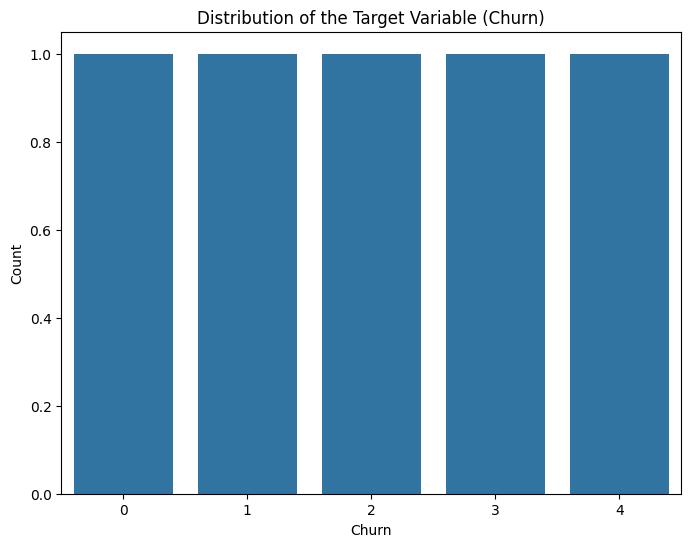

Target
0    80.0
1    20.0
Name: count, dtype: float64


In [28]:
# Plot the distribution of the target variable
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(df['Target'])
plt.title('Distribution of the Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each class
target_counts = df['Target'].value_counts()
target_percentages = target_counts / len(df) * 100
print(target_percentages)


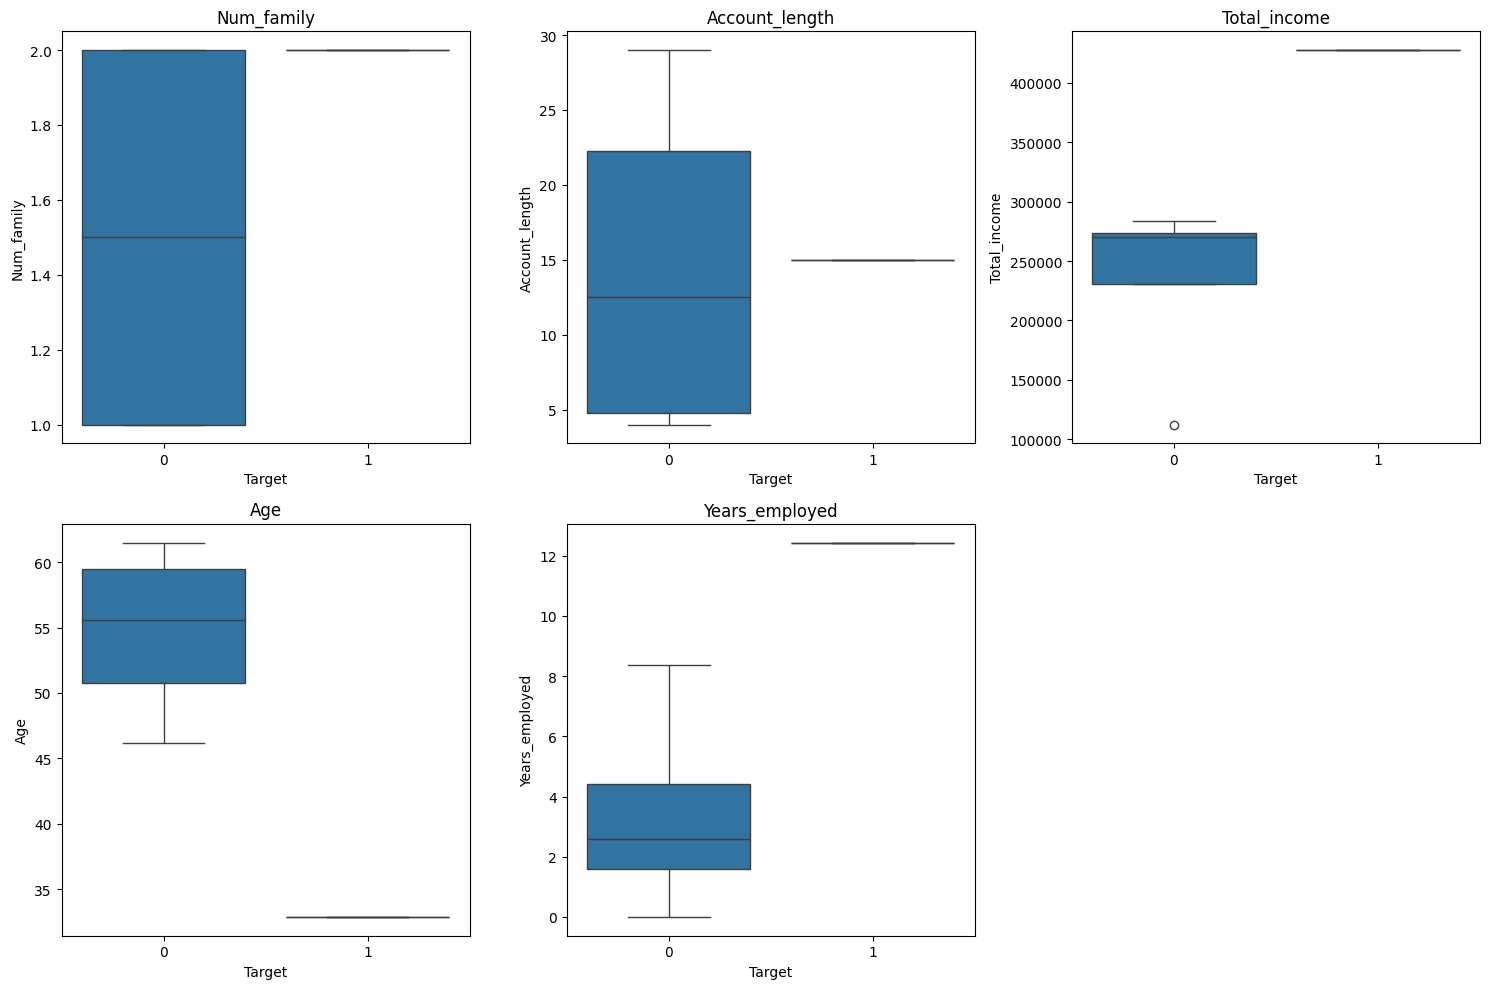

In [29]:
# Plot box plots for numerical features vs. target variable
numerical_features = ['Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Target', y=column, data=df)
    plt.title(column)
    plt.tight_layout()

plt.show()


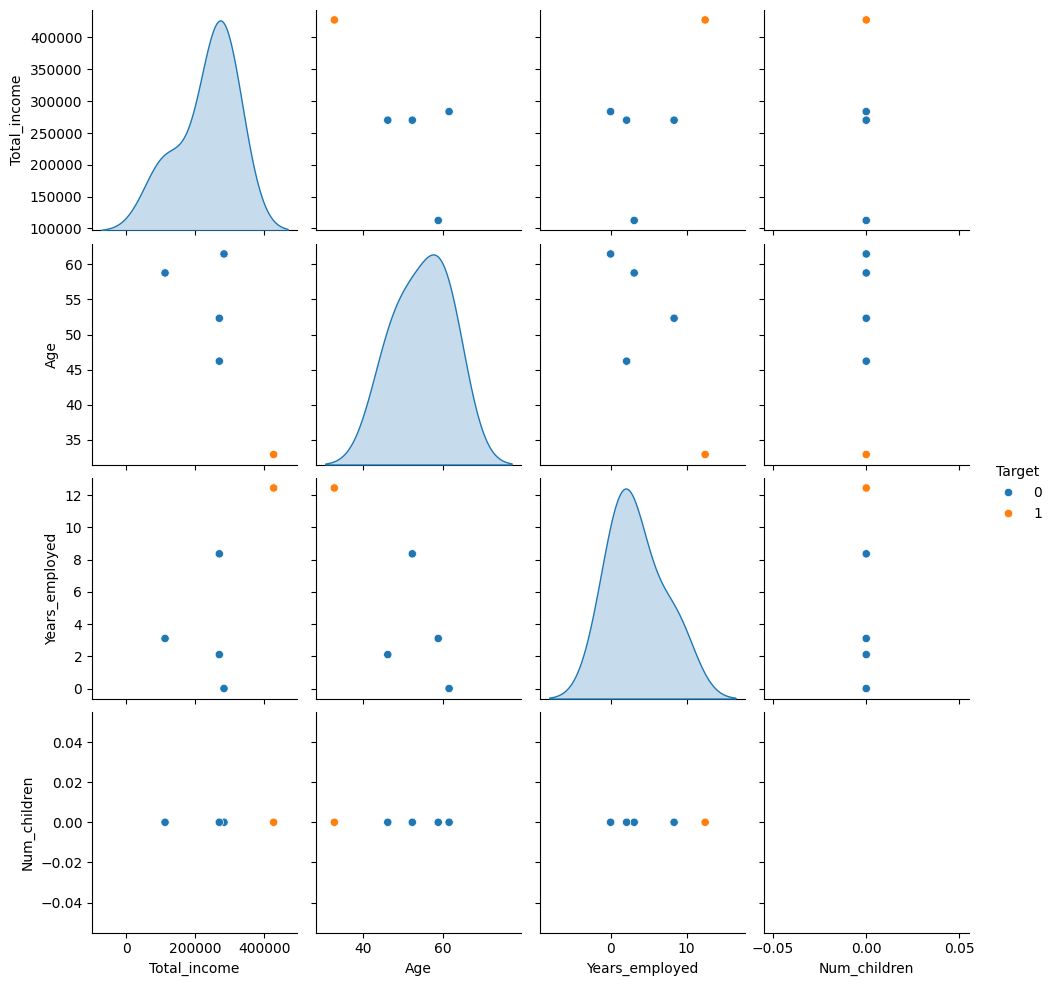

In [30]:
# Pair plot of selected numerical features
selected_features = ['Total_income', 'Age', 'Years_employed', 'Num_children']
sns.pairplot(df[selected_features + ['Target']], hue='Target', diag_kind='kde')
plt.show()


At below, we will see the frequency of target value and visualisation using a bar chart.

A bar chart showing the frequency of each target value.

<ipython-input-31-848b3773a0ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_frequency.index, y=target_frequency.values, palette='viridis')


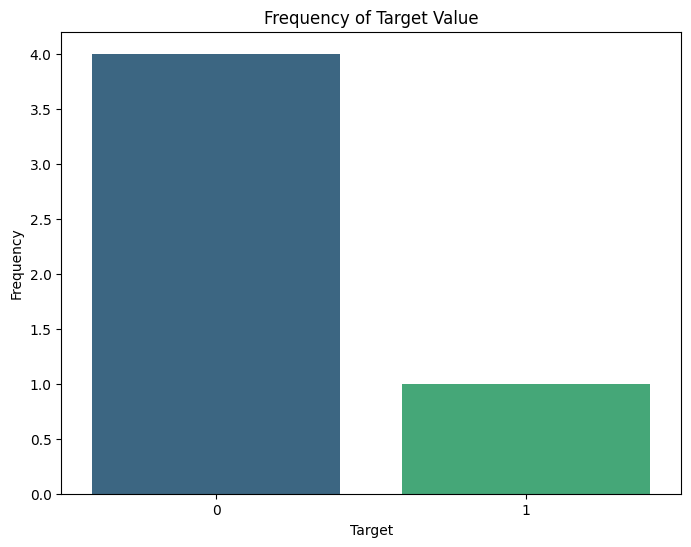

In [31]:
target_frequency = df['Target'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=target_frequency.index, y=target_frequency.values, palette='viridis')
plt.title('Frequency of Target Value')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


Will try to observe the distribution of age, education level, and occupation type in the dataset?

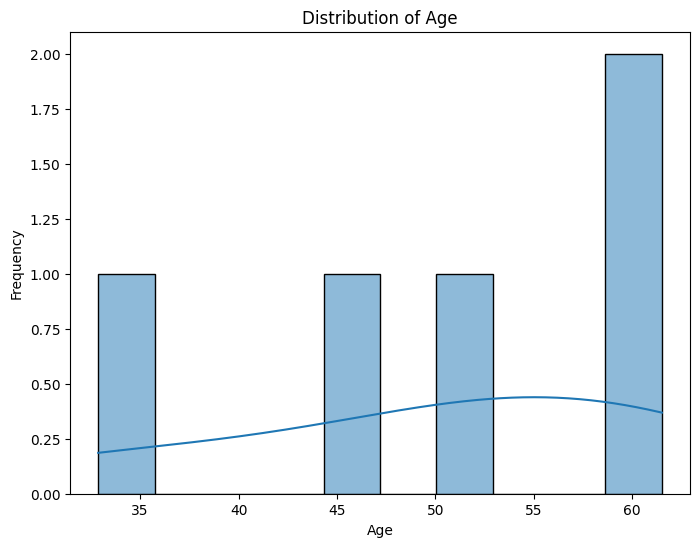

In [32]:
#check the distribution for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-33-8179c7eb7eee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Education_type', data=df, palette='viridis')


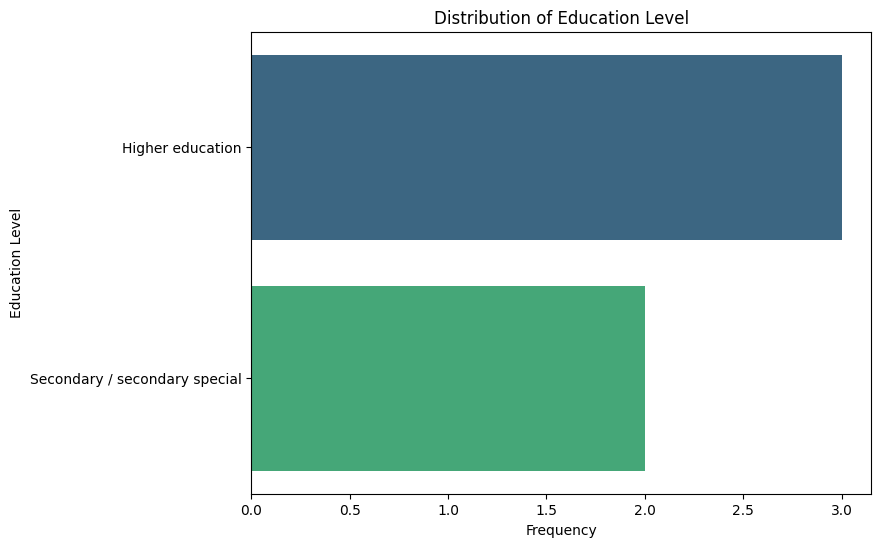

In [33]:
# chek the distribution of Education Level
plt.figure(figsize=(8, 6))
sns.countplot(y='Education_type', data=df, palette='viridis')
plt.title('Distribution of Education Level')
plt.xlabel('Frequency')
plt.ylabel('Education Level')
plt.show()

<ipython-input-34-efef9188684a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation_type', data=df, palette='viridis')


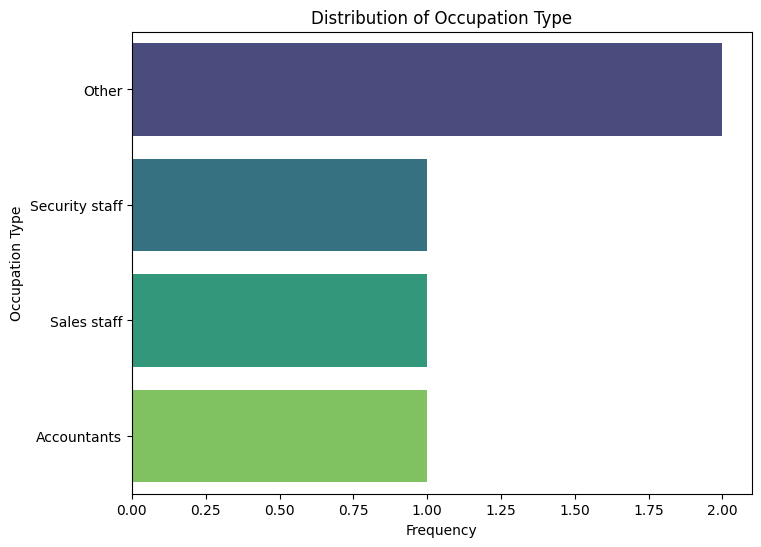

In [34]:
# distribution of Occupation Type
plt.figure(figsize=(8, 6))
sns.countplot(y='Occupation_type', data=df, palette='viridis')
plt.title('Distribution of Occupation Type')
plt.xlabel('Frequency')
plt.ylabel('Occupation Type')
plt.show()


Check the frequency for above colums- aocupation type,education level

In [35]:
education_frequency = df['Education_type'].value_counts()
print("Frequency of Education Level:\n", education_frequency)

occupation_frequency = df['Occupation_type'].value_counts()
print("\nFrequency of Occupation Type:\n", occupation_frequency)


Frequency of Education Level:
 Education_type
Higher education                 3
Secondary / secondary special    2
Name: count, dtype: int64

Frequency of Occupation Type:
 Occupation_type
Other             2
Security staff    1
Sales staff       1
Accountants       1
Name: count, dtype: int64


Use Python's pandas library to calculate the mean and median of total income and visualize it using a histogram. Then, use correlation analysis to identify relationships between total income and other variables.

In [36]:
# Calculate mean and median of Total_income
mean_total_income = df['Total_income'].mean()
print(f"Mean Total Income: {mean_total_income}")



Mean Total Income: 272700.0


In [37]:
median_total_income = df['Total_income'].median()
print(f"Median Total Income: {median_total_income}")

Median Total Income: 270000.0


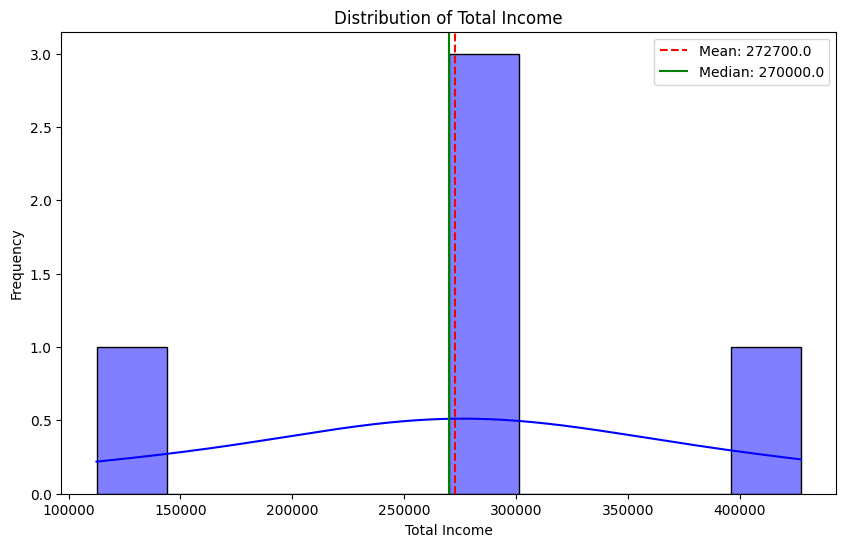

In [38]:
# Visualize Total_income distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_income'], bins=10, kde=True, color='blue')
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.axvline(mean_total_income, color='r', linestyle='--', label=f'Mean: {mean_total_income}')
plt.axvline(median_total_income, color='g', linestyle='-', label=f'Median: {median_total_income}')
plt.legend()
plt.show()

distribution of family status and housing type in the dataset?

In [39]:
family_status_counts = df['Family_status'].value_counts()
print("Family Status Distribution:")
print(family_status_counts)

housing_type_counts = df['Housing_type'].value_counts()
print("\nHousing Type Distribution:")
print(housing_type_counts)

Family Status Distribution:
Family_status
Married                 2
Civil marriage          1
Single / not married    1
Separated               1
Name: count, dtype: int64

Housing Type Distribution:
Housing_type
House / apartment    4
Rented apartment     1
Name: count, dtype: int64


<ipython-input-40-864fe147f981>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_status_counts.index, y=family_status_counts.values, palette='viridis')


([0, 1, 2, 3],
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Civil marriage'),
  Text(2, 0, 'Single / not married'),
  Text(3, 0, 'Separated')])

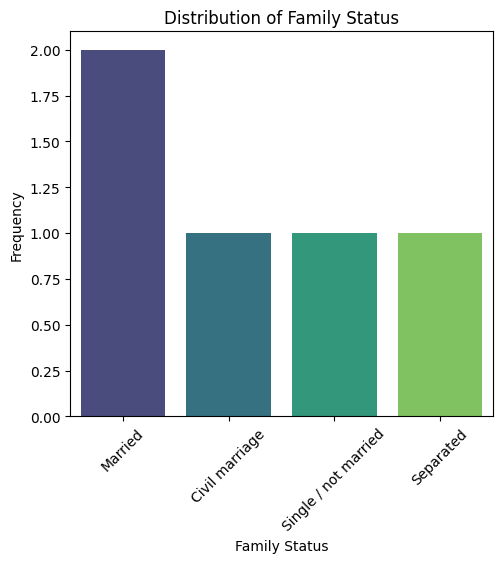

In [40]:
# Family status distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=family_status_counts.index, y=family_status_counts.values, palette='viridis')
plt.title('Distribution of Family Status')
plt.xlabel('Family Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

<ipython-input-42-c3897596c2b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_type_counts.index, y=housing_type_counts.values, palette='viridis')


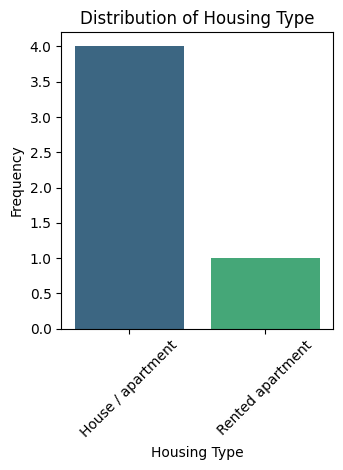

In [42]:
# Housing type distribution
plt.subplot(1, 2, 2)
sns.barplot(x=housing_type_counts.index, y=housing_type_counts.values, palette='viridis')
plt.title('Distribution of Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()